<a href="https://colab.research.google.com/github/wolfinwallst/Financial_Engineering_and_Risk_Management/blob/main/VaR_cVaR_MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. VaR = 특정 신뢰수준에서의 최대 예상 손실
2. CVaR = VaR를 초과하는 손실의 평균

Monte-Carlo 시뮬레이션을 통해 99%, 95% 90% 신뢰수준하에서의 VaR 계산

[*********************100%***********************]  1 of 1 completed



Monte Carlo Simulation을 이용한 VaR 결과 (단위: 달러):
99% 신뢰구간 VaR: -27,191.77
95% 신뢰구간 VaR: -19,474.65
90% 신뢰구간 VaR: -15,074.80


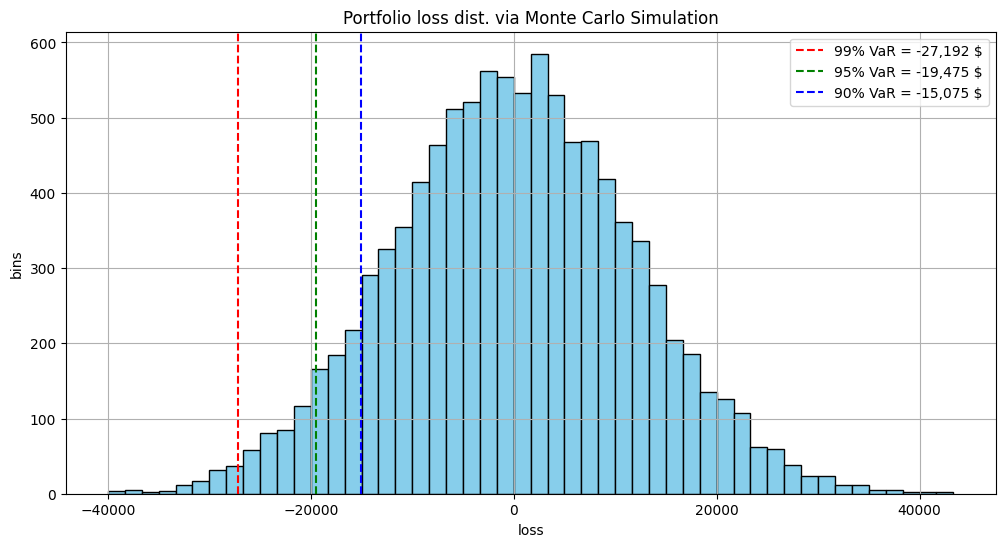

In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime

ticker = "^GSPC"

# 데이터 기간 설정 (예: 최근 1년 간의 데이터)
end_date = datetime.datetime.today()
start_date = end_date - datetime.timedelta(days=365)

data = yf.download(ticker, start=start_date, end=end_date)
prices = data['Close']

# ------------------------ 로그수익률, 의 평균과 표준편차 계산 ----------------------------
log_returns = np.log(prices / prices.shift(1)).dropna()
mu = log_returns.mean()
sigma = log_returns.std()

# print(f"로그수익률 평균: {mu:.6f}, 로그수익률 표준편차: {sigma:.6f}")

# ------------------------ Monte-Carlo 시뮬레이션 ----------------------------
# 시뮬레이션 설정
num_simulations = 10000   # 시뮬레이션 횟수
time_horizon = 1          # 리스크 기간 (1일)
# np.random.seed(42)        # 재현성을 위한 시드 설정

# 정규분포를 이용하여 내일의 로그수익률 예측 시뮬레이션
simulated_returns = np.random.normal(mu * time_horizon, sigma * np.sqrt(time_horizon), num_simulations)

# 투자금액 (예: 1백만 달러)
portfolio_value = 1_000_000
# 시뮬레이션된 내일의 포트폴리오 가치 (단순히 로그수익률 근사: V_new = V * exp(r))
simulated_values = portfolio_value * np.exp(simulated_returns)

# 포트폴리오 손실 = 현재 가치 - 시뮬레이션 결과(손실이면 음의 값으로 표현)
losses = portfolio_value - simulated_values

conf_levels = [0.99, 0.95, 0.90] # 신뢰수준: 99%, 95%, 90%
VaRs = {}

for conf in conf_levels:
    # np.percentile는 백분위수를 계산
    # (예시) 1% 백분위수는 0.01 백분위수 → (1 - conf) * 100 백분위수를 선택
    var_value = np.percentile(losses, (1 - conf) * 100)
    VaRs[conf] = var_value

print("\nMonte Carlo Simulation을 이용한 VaR 결과 (단위: 달러):")
for conf, var_value in VaRs.items():
    print(f"{int(conf*100)}% 신뢰구간 VaR: {var_value:,.2f}")

# ------------------------ 결과 시각화 ----------------------------
plt.figure(figsize=(12, 6))
plt.hist(losses, bins=50, color='skyblue', edgecolor='black')
plt.title("Portfolio loss dist. via Monte Carlo Simulation")
plt.xlabel("loss")
plt.ylabel("bins")

# 신뢰수준별 VaR 위치에 수직선 표시
colors = {0.99: 'red', 0.95: 'green', 0.90: 'blue'}
for conf in conf_levels:
    plt.axvline(VaRs[conf], color=colors[conf], linestyle='--',
                label=f"{int(conf*100)}% VaR = {VaRs[conf]:,.0f} $")

plt.legend()
plt.grid(True)
plt.show()

# ------------------------ 코드 설명 ----------------------------
# 1. 데이터 다운로드:
#    - yfinance 라이브러리를 사용하여 S&P500 (^GSPC)의 조정 종가 데이터를 최근 1년 간 다운로드
#
# 2. 로그수익률 계산:
#    - 로그수익률은 연속복리 수익률이며, 오늘과 어제의 가격비율의 로그를 취하여 계산
#    - 이 로그수익률의 평균(mu)과 표준편차(sigma)를 추정
#
# 3. Monte Carlo Simulation:
#    - 정규분포 (평균 mu, 표준편차 sigma)를 사용하여 내일의 로그수익률 10,000회 시뮬레이션
#    - 시뮬레이션된 로그수익률로 포트폴리오 가치의 변화를 계산
#
# 4. VaR 계산:
#    - 포트폴리오 손실(losses)을 구한 후, (1 - 신뢰수준)에 해당하는 백분위수 값을 VaR로 정의
#    - 예: 99% 신뢰수준 VaR는 전체 손실 분포의 하위 1% 지점에 해당하는 손실액입니다.
#
# 5. 결과 시각화:
#    - 손실 분포에 대한 히스토그램을 그린 후, 신뢰수준별 VaR 값을 수직선으로 표시
#
# 이 코드는 금융 데이터에 기반한 VaR 산출 방법의 한 예시입니다. 실제 현업에서는 보다 복잡한 리스크 팩터, 비정상 분포, 포트폴리오 구성 등을 고려해야 함

[*********************100%***********************]  1 of 1 completed



Monte Carlo Simulation을 이용한 VaR 결과 (단위: 달러):
99% 신뢰구간 VaR: -28,540.72
95% 신뢰구간 VaR: -19,843.25
90% 신뢰구간 VaR: -15,429.03

Monte Carlo Simulation을 이용한 CVaR 결과 (단위: 달러):
99 신뢰구간 CVaR: -112.19
95 신뢰구간 CVaR: 860.53
90 신뢰구간 CVaR: 1,881.11


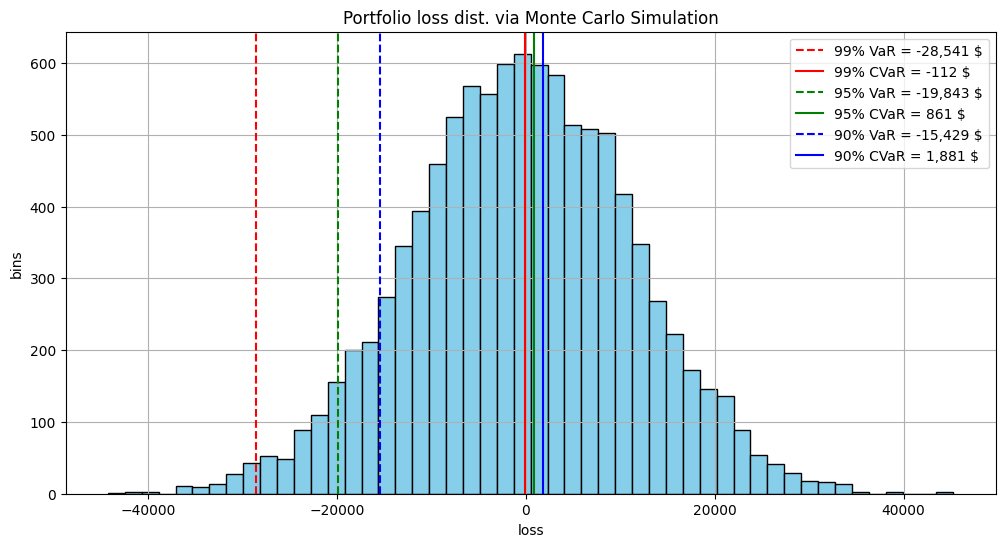

In [3]:
# CVaR 추가

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime

# ------------------------ 데이터 다운로드 ----------------------------
ticker = "^GSPC"

end_date = datetime.datetime.today()
start_date = end_date - datetime.timedelta(days=365)

data = yf.download(ticker, start=start_date, end=end_date)
prices = data['Close']

# ------------------------ 로그수익률 계산 ----------------------------
log_returns = np.log(prices / prices.shift(1)).dropna()
mu = log_returns.mean()
sigma = log_returns.std()

# print(f"로그수익률 평균: {mu:.6f}, 로그수익률 표준편차: {sigma:.6f}")

# ------------------------ Monte-Carlo 시뮬레이션 ----------------------------
# 시뮬레이션 설정
num_simulations = 10000   # 시뮬레이션 횟수
time_horizon = 1          # 리스크 기간 (1일)
# np.random.seed(42)        # 재현성을 위한 시드 설정

# 정규분포를 이용하여 내일의 로그수익률 예측 시뮬레이션
simulated_returns = np.random.normal(mu * time_horizon, sigma * np.sqrt(time_horizon), num_simulations)

# 투자금액을 가정 (예: 1백만 달러)
portfolio_value = 1_000_000
# 시뮬레이션된 내일의 포트폴리오 가치 (단순히 로그수익률 근사: V_new = V * exp(r))
simulated_values = portfolio_value * np.exp(simulated_returns)

# 포트폴리오 손실 = 현재 가치 - 시뮬레이션 결과 (손실이면 양의 값)
losses = portfolio_value - simulated_values

# ------------------------ VaR 계산 ----------------------------
# VaR는 "Value at Risk"로, 일정 신뢰수준 하에서의 최대 예상 손실
# 신뢰수준: 99%, 95%, 90%
conf_levels = [0.99, 0.95, 0.90]
VaRs = {}

for conf in conf_levels:
    # (1 - 신뢰수준)에 해당하는 백분위수 값을 VaR로 정의
    # 예: 99% 신뢰수준의 경우 하위 1% (즉, (1-0.99)*100 = 1번째 백분위수)
    var_value = np.percentile(losses, (1 - conf) * 100)
    VaRs[conf] = var_value

print("\nMonte Carlo Simulation을 이용한 VaR 결과 (단위: 달러):")
for conf, var_value in VaRs.items():
    print(f"{int(conf*100)}% 신뢰구간 VaR: {var_value:,.2f}")

# ------------------------ CVaR 계산 ----------------------------
# CVaR (Conditional Value at Risk): VaR를 초과하는 손실의 평균값
CVaRs = {}
for conf in conf_levels:
    var_value = VaRs[conf]
    # VaR 이상 손실인 경우 (극단적인 손실만 선택)
    tail_losses = losses[losses >= var_value]
    # 선택된 tail losses의 평균을 CVaR로 계산
    cvar = tail_losses.mean() if len(tail_losses) > 0 else np.nan
    CVaRs[conf] = cvar

print("\nMonte Carlo Simulation을 이용한 CVaR 결과 (단위: 달러):")
for conf, cvar in CVaRs.items():
    print(f"{int(conf*100)} 신뢰구간 CVaR: {cvar:,.2f}")

# ------------------------ 결과 시각화 ----------------------------
plt.figure(figsize=(12, 6))
plt.hist(losses, bins=50, color='skyblue', edgecolor='black')
plt.title("Portfolio loss dist. via Monte Carlo Simulation")
plt.xlabel("loss")
plt.ylabel("bins")

# 신뢰수준별 VaR 및 CVaR 위치에 수직선 표시
colors = {0.99: 'red', 0.95: 'green', 0.90: 'blue'}
for conf in conf_levels:
    plt.axvline(VaRs[conf], color=colors[conf], linestyle='--',
                label=f"{int(conf*100)}% VaR = {VaRs[conf]:,.0f} $")
    plt.axvline(CVaRs[conf], color=colors[conf], linestyle='-',
                label=f"{int(conf*100)}% CVaR = {CVaRs[conf]:,.0f} $")

plt.legend()
plt.grid(True)
plt.show()

# ------------------------ 코드 설명 ----------------------------
# 1. 데이터 다운로드 및 로그수익률 계산:
#    - yfinance를 사용하여 S&P500 지수를 대상으로 최근 1년 간의 조정 종가를 다운로드하고, 로그수익률을 계산합니다.
#
# 2. Monte Carlo Simulation:
#    - 추정한 로그수익률의 평균(mu)과 표준편차(sigma)를 이용해 내일의 로그수익률을 모의실험합니다.
#    - 모의실험 결과를 기반으로 포트폴리오의 내일 가치를 예측하고, 현재 가치와의 차이를 통해 손실을 계산합니다.
#
# 3. VaR 계산:
#    - 전체 손실 분포에서 (1 - 신뢰수준)에 해당하는 백분위수 값을 VaR로 정의합니다.
#
# 4. CVaR 계산:
#    - 각 신뢰수준에 대해, 해당 VaR 이상의 손실만을 선택한 후 이들의 평균을 계산하여 CVaR (Conditional VaR, Expected Shortfall)을 산출합니다.
#
# 5. 결과 시각화:
#    - 손실 분포의 히스토그램 위에 신뢰수준별 VaR (점선)와 CVaR (실선)을 각각 수직선으로 표시하여, 리스크 평가 결과를 시각적으로 확인합니다.


[*********************100%***********************]  5 of 5 completed


포트폴리오 로그수익률 평균: 0.000161, 표준편차: 0.016416

Monte Carlo Simulation을 이용한 포트폴리오 VaR (단위: 달러):
99% 신뢰구간 VaR: -38,906.20
95% 신뢰구간 VaR: -27,314.91
90% 신뢰구간 VaR: -21,434.60

Monte Carlo Simulation을 이용한 포트폴리오 CVaR (단위: 달러):
99% 신뢰구간 CVaR: 142.01
95% 신뢰구간 CVaR: 1,498.71
90% 신뢰구간 CVaR: 2,923.24


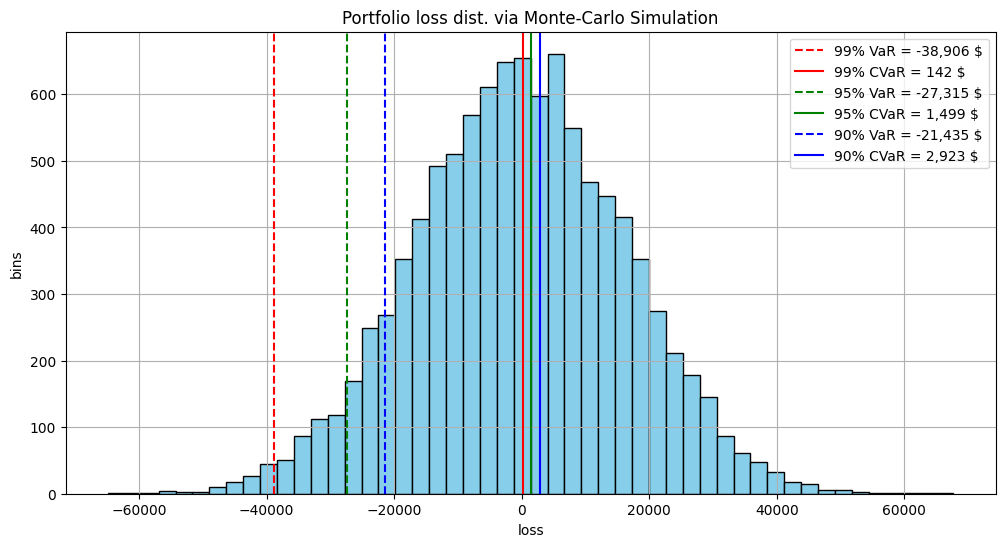

In [4]:
# 포트폴리오의 VaR, CVaR 구하기

# 필요한 라이브러리 임포트
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime

# ------------------------ 포트폴리오 자산 및 비중 설정 ---------------------------- [수정됨]
# 예시: 기술주 중심의 포트폴리오
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META']
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])  # 동일 가중치 예시

# 데이터 기간 설정
end_date = datetime.datetime.today()
start_date = end_date - datetime.timedelta(days=365)

# ------------------------ 데이터 다운로드 및 로그수익률 계산 ---------------------------- [수정됨]
data = yf.download(tickers, start=start_date, end=end_date)['Close']
data = data.dropna()

# 로그수익률 계산: log(P_t / P_{t-1})
log_returns = np.log(data / data.shift(1)).dropna()

# 포트폴리오 로그수익률 계산 (자산별 수익률 * 비중 합산)
portfolio_log_returns = log_returns @ weights

# 평균 및 표준편차 계산
mu = portfolio_log_returns.mean()
sigma = portfolio_log_returns.std()

print(f"포트폴리오 로그수익률 평균: {mu:.6f}, 표준편차: {sigma:.6f}")

# ------------------------ Monte Carlo 시뮬레이션 ----------------------------
num_simulations = 10000
time_horizon = 1
# np.random.seed(42)

# 시뮬레이션된 로그수익률 생성
simulated_returns = np.random.normal(mu * time_horizon, sigma * np.sqrt(time_horizon), num_simulations)

# 포트폴리오 현재 가치 가정 (예: 1백만 달러)
portfolio_value = 1_000_000
simulated_values = portfolio_value * np.exp(simulated_returns)
losses = portfolio_value - simulated_values

# ------------------------ VaR 계산 ----------------------------
conf_levels = [0.99, 0.95, 0.90]
VaRs = {}

for conf in conf_levels:
    var_value = np.percentile(losses, (1 - conf) * 100)
    VaRs[conf] = var_value

print("\nMonte Carlo Simulation을 이용한 포트폴리오 VaR (단위: 달러):")  # [수정됨]
for conf, var_value in VaRs.items():
    print(f"{int(conf*100)}% 신뢰구간 VaR: {var_value:,.2f}")

# ------------------------ CVaR 계산 ----------------------------
CVaRs = {}
for conf in conf_levels:
    var_value = VaRs[conf]
    tail_losses = losses[losses >= var_value]
    cvar = tail_losses.mean() if len(tail_losses) > 0 else np.nan
    CVaRs[conf] = cvar

print("\nMonte Carlo Simulation을 이용한 포트폴리오 CVaR (단위: 달러):")  # [수정됨]
for conf, cvar in CVaRs.items():
    print(f"{int(conf*100)}% 신뢰구간 CVaR: {cvar:,.2f}")

# ------------------------ 결과 시각화 ----------------------------
plt.figure(figsize=(12, 6))
plt.hist(losses, bins=50, color='skyblue', edgecolor='black')
plt.title("Portfolio loss dist. via Monte-Carlo Simulation")  # [수정됨]
plt.xlabel("loss")
plt.ylabel("bins")


colors = {0.99: 'red', 0.95: 'green', 0.90: 'blue'}
for conf in conf_levels:
    plt.axvline(VaRs[conf], color=colors[conf], linestyle='--',
                label=f"{int(conf*100)}% VaR = {VaRs[conf]:,.0f} $")
    plt.axvline(CVaRs[conf], color=colors[conf], linestyle='-',
                label=f"{int(conf*100)}% CVaR = {CVaRs[conf]:,.0f} $")

plt.legend()
plt.grid(True)
plt.show()